# EU classification system for green investments – feedback review

Few descriptive staticstics of the feedback received to the EC [consultation](https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/12302-Climate-change-mitigation-and-adaptation-taxonomy) on the new taxonomy of sustainable finance.

Covers only metadata such as type of subject (company, NGO, association, etc.) posting the feedback or country of origin.

This consultation is unique as lot of the feedback has been generated by a NGO campaign [Stop Fake Green](https://www.stopfakegreen.eu/).

Therefore, some of the plots are prepared separately for feedback generated by the campaign and the rest. The campaign generated feedback is identified simply by a sentence from the generic response (It seems from the website's policy, that users were not able to alter this generic response).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', low_memory=False)

In [2]:
df = df.fillna('n/a')

In [3]:
df.columns

Index(['id', 'publication_id', 'reference_initiative', 'date_feedback',
       'language', 'country', 'organization', 'first_name', 'surname',
       'user_type', 'company_size', 'attachment_url', 'attachment_filename',
       'feedback'],
      dtype='object')

In [4]:
df.shape

(46591, 14)

In [5]:
pd.set_option('display.max_colwidth', 50)

In [6]:
df.head()

,id,publication_id,reference_initiative,date_feedback,language,country,organization,first_name,surname,user_type,company_size,attachment_url,attachment_filename,feedback
0,1355607,16015203,Ares(2020)6979284,2020/12/18 23:59:57,EN,DEU,n/a,Ursula,Kastner,EU_CITIZEN,n/a,https://ec.europa.eu/info/law/better-regulatio...,Joint_NGO_Analysis_of_EU_Taxonomy_Climate_Dele...,Dear President von der Leyen \nExecutive Vice ...
1,1355606,16015203,Ares(2020)6979284,2020/12/18 23:59:55,EN,DEU,n/a,Birgit,Siedler,EU_CITIZEN,n/a,https://ec.europa.eu/info/law/better-regulatio...,Joint_NGO_Analysis_of_EU_Taxonomy_Climate_Dele...,Dear President von der Leyen \nExecutive Vice ...
2,1355605,16015203,Ares(2020)6979284,2020/12/18 23:59:52,EN,FRA,n/a,Jean-Paul,KARSENTY,EU_CITIZEN,n/a,https://ec.europa.eu/info/law/better-regulatio...,Joint_NGO_Analysis_of_EU_Taxonomy_Climate_Dele...,Dear President von der Leyen \nExecutive Vice ...
3,1355604,16015203,Ares(2020)6979284,2020/12/18 23:59:51,EN,ESP,n/a,Miguel Angel,compan martinez,EU_CITIZEN,n/a,https://ec.europa.eu/info/law/better-regulatio...,Joint_NGO_Analysis_of_EU_Taxonomy_Climate_Dele...,Dear President von der Leyen \nExecutive Vice ...
4,1355603,16015203,Ares(2020)6979284,2020/12/18 23:59:49,EN,FRA,n/a,Chantal,BISLINSKI,EU_CITIZEN,n/a,https://ec.europa.eu/info/law/better-regulatio...,Joint_NGO_Analysis_of_EU_Taxonomy_Climate_Dele...,Dear President von der Leyen \nExecutive Vice ...


## All feedback

### Feedback by subject type

In [7]:
df['user_type'].value_counts().reset_index().rename(columns={'user_type': 'counts', 'index': 'user_type'}).to_excel('all_counts_user_type.xlsx')
df['user_type'].value_counts()

EU_CITIZEN                        45220
n/a                                 459
COMPANY                             310
BUSINESS_ASSOCIATION                283
NGO                                 132
OTHER                                62
PUBLIC_AUTHORITY                     39
ACADEMIC_RESEARCH_INSTITTUTION       35
ENVIRONMENTAL_ORGANISATION           30
NON_EU_CITIZEN                       13
TRADE_UNION                           8
Name: user_type, dtype: int64

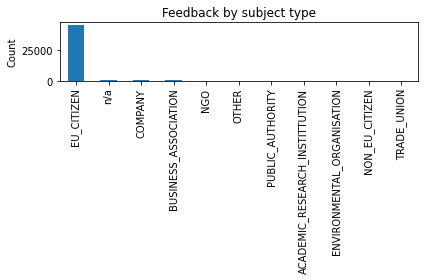

In [8]:
ax = df['user_type'].value_counts().plot(
    kind='bar',
    title='Feedback by subject type',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('all_user_bar.png')

### Feedback by country


In [9]:
df['country'].value_counts().reset_index().rename(columns={'country': 'counts', 'index': 'country'}).to_excel('all_counts_country.xlsx')
df['country'].value_counts()

FRA    17775
DEU    15999
ESP     3618
BEL     2680
ITA     2340
       ...  
MKD        1
VNM        1
KOR        1
ALA        1
SYC        1
Name: country, Length: 80, dtype: int64

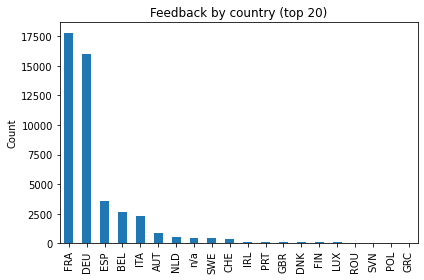

In [10]:
ax = df['country'].value_counts()[:20].plot(
    kind='bar',
    title='Feedback by country (top 20)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('all_country_bar.png')

### Feedback by subject company size


In [11]:
df['company_size'].value_counts()

n/a       45692
LARGE       268
MICRO       267
SMALL       208
MEDIUM      156
Name: company_size, dtype: int64

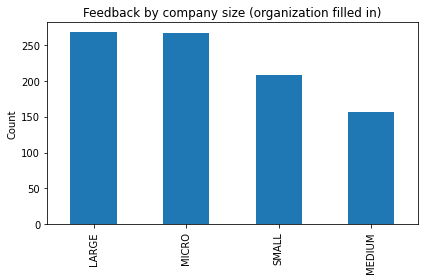

In [12]:
ax = df[df['organization'] != 'n/a']['company_size'].value_counts().plot(
    kind='bar',
    title='Feedback by company size (organization filled in)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('all_company_size_bar.png')

## Only Stop Fake Green campaign feedback
Identified by a single sentence 'The criteria on bioenergy are far too weak and will encourage things that increase emissions' from the generic response.

In [13]:
ngo_campain = df['feedback'].str.contains('The criteria on bioenergy are far too weak and will encourage things that increase emissions')
ngo_campain.value_counts()

True     44797
False     1794
Name: feedback, dtype: int64

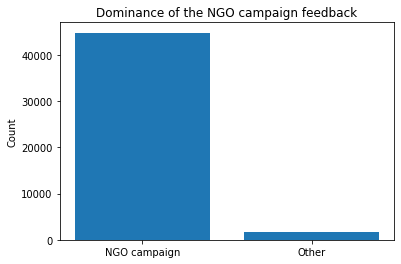

In [14]:
plt.bar(['NGO campaign', 'Other'], ngo_campain.value_counts())
plt.title('Dominance of the NGO campaign feedback')
plt.ylabel('Count')
plt.savefig('all_dominance_campaign_bar.png')

In [15]:
df[ngo_campain]['user_type'].value_counts()

EU_CITIZEN    44789
n/a               8
Name: user_type, dtype: int64

In [16]:
df[ngo_campain]['country'].value_counts()
df[ngo_campain]['country'].value_counts().reset_index().rename(columns={'country': 'counts', 'index': 'country'}).to_excel('only_campaign_country.xlsx')

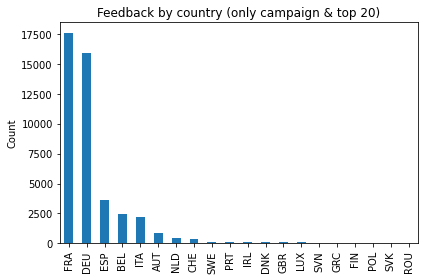

In [17]:
ax = df[ngo_campain]['country'].value_counts()[:20].plot(
    kind='bar',
    title='Feedback by country (only campaign & top 20)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('only_campaign_country.png')

## Without Stop Fake Green campaign feedback

Text(0, 0.5, 'Count')

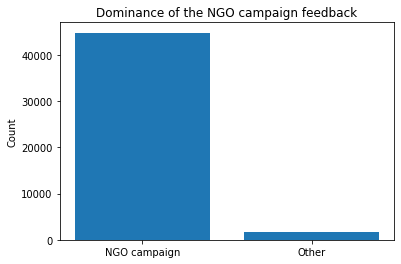

In [18]:
plt.bar(['NGO campaign', 'Other'], ngo_campain.value_counts())
plt.title('Dominance of the NGO campaign feedback')
plt.ylabel('Count')

### Feedback by subject type

In [19]:
df[~ngo_campain]['user_type'].value_counts().reset_index().rename(columns={'user_type': 'counts', 'index': 'user_type'}).to_excel('without_campaign_user_type.xlsx')
df[~ngo_campain]['user_type'].value_counts()

n/a                               451
EU_CITIZEN                        431
COMPANY                           310
BUSINESS_ASSOCIATION              283
NGO                               132
OTHER                              62
PUBLIC_AUTHORITY                   39
ACADEMIC_RESEARCH_INSTITTUTION     35
ENVIRONMENTAL_ORGANISATION         30
NON_EU_CITIZEN                     13
TRADE_UNION                         8
Name: user_type, dtype: int64

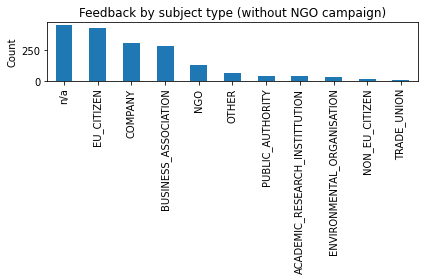

In [20]:
ax = df[~ngo_campain]['user_type'].value_counts().plot(
    kind='bar',
    title='Feedback by subject type (without NGO campaign)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('without_campaign_user_type.png')

### Feedback by country

In [21]:
df[~ngo_campain]['country'].value_counts().reset_index().rename(columns={'country': 'counts', 'index': 'country'}).to_excel('without_campaign_country.xlsx')
df[~ngo_campain]['country'].value_counts()

n/a    451
SWE    279
BEL    215
FRA    197
ITA    103
DEU    100
NLD     71
ROU     49
FIN     45
GBR     35
AUT     33
ESP     31
NOR     30
CZE     19
POL     18
IRL     13
CHE     12
DNK      9
USA      9
HUN      7
LTU      6
SVK      6
ISL      4
RUS      4
CAN      4
SVN      4
PRT      4
UKR      3
JPN      3
GRC      3
BRA      3
LVA      3
ALB      2
BGR      2
MNE      2
MLT      2
HRV      2
AUS      2
LUX      2
PHL      1
ALA      1
MKD      1
BIH      1
EST      1
GUF      1
KOR      1
Name: country, dtype: int64

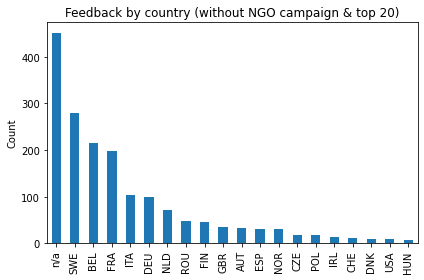

In [22]:
ax = df[~ngo_campain]['country'].value_counts()[:20].plot(
    kind='bar',
    title='Feedback by country (without NGO campaign & top 20)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('without_campaign_country_bar.png')

In [23]:
df[~ngo_campain]['company_size'].value_counts()

n/a       895
LARGE     268
MICRO     267
SMALL     208
MEDIUM    156
Name: company_size, dtype: int64

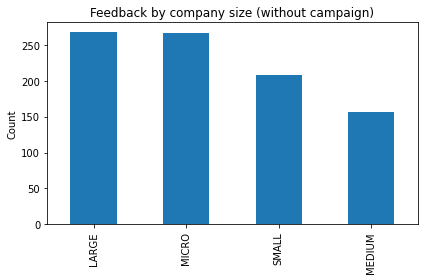

In [24]:
ax = df[(~ngo_campain) & (df['organization'] != 'n/a')]['company_size'].value_counts().plot(
    kind='bar',
    title='Feedback by company size (without campaign)',
    ylabel='Count',
    )
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('company_size_without_campaign.png')

In [25]:
df[~ngo_campain].reset_index().to_excel('taxonomy_without_campaign_export.xlsx', index_label='index_without_campaign')

In [26]:
df[~ngo_campain].reset_index().to_csv('taxonomy_without_campaign_export.csv', index_label='index_without_campaign')